In [1]:
import pandas as pd
import numpy as np 

#visalization 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Train.csv')
data 

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [4]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The  dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The  dataset contains 1.3 % missing values.


In [5]:
data.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

missing values: 
travel with replace with alone,
mostimpressing -> nocomment, 
total_male and female replace with 0

In [6]:
def fill_null(df,col,val):
    df[col] = df[col].fillna(val)


In [7]:
fill_null(data,'total_male',0)
fill_null(data,'total_female',0)
fill_null(data,'most_impressing','No comments')
fill_null(data,'travel_with','Alone')

NON - GRAPHICAL UNIVARIATE EXPLORATION


which country has the higest number of visitors

In [19]:
data['country'].value_counts()

UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: country, Length: 105, dtype: int64

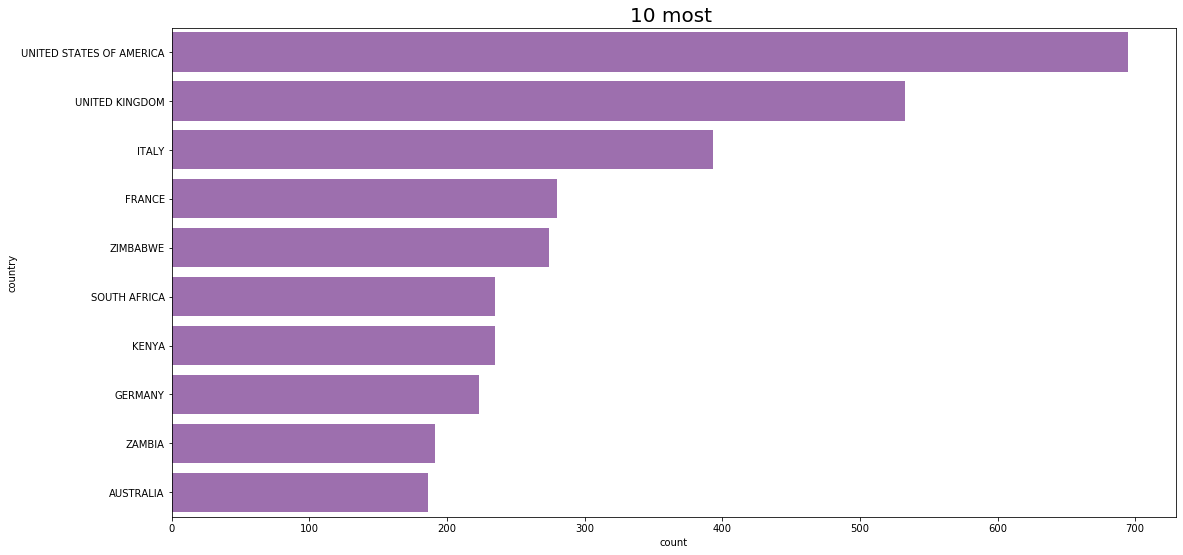

In [10]:
bar_p(data,'country','10 most ')

Age group of people visiting 

In [21]:
data['age_group'].value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

In [22]:
group_donut(data['age_group'],'')

TypeError: '<' not supported between instances of 'str' and 'int'

plot 

In [8]:
# tourist from with country mostly come 
# Age group 
# how many are travelling lon of with family 
#how many male visited how many female visited
# popular purpose
# are the once coming with tors spending more 
# age group of people coming with tours 
#travel_with and amount spent
# purpose and and amount spent

In [9]:
def plot_count(df:pd.DataFrame, column:str,title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column) 
    plt.xticks(rotation=75, fontsize=14)
    plt.title(title, size=20)
    plt.show()
def group_donut(grouped_data,title: str):
    grouped_data.plot.pie(subplots=True,figsize=(18, 9),autopct="%.1f%%",pctdistance=0.85)
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title,font="Serif", size=20)
    plt.show()
def bar_p(df:pd.DataFrame, column:str,title:str):
    plt.figure(figsize=(18, 9))
    sns.countplot(y=column, data=data, order=df[column].value_counts().head(10).index,color = "#a265b8")
    plt.title(title, size=20)
    plt.show()

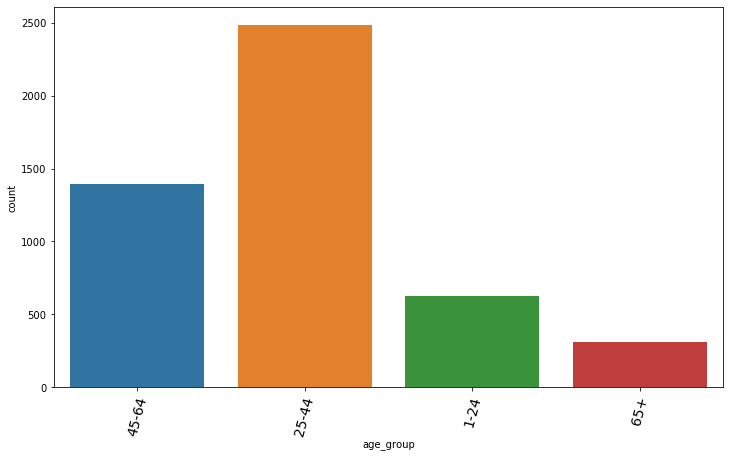

In [11]:
plot_count(data,'age_group','')

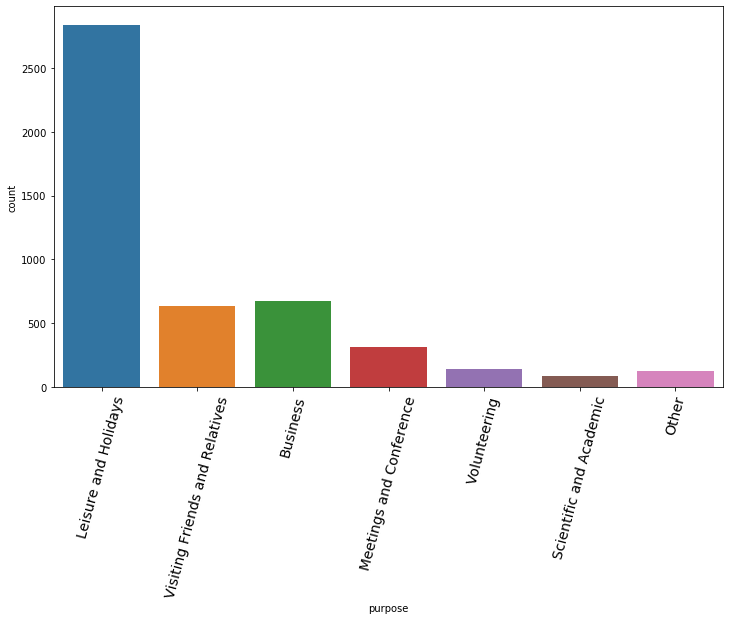

In [12]:
plot_count(data,'purpose','')

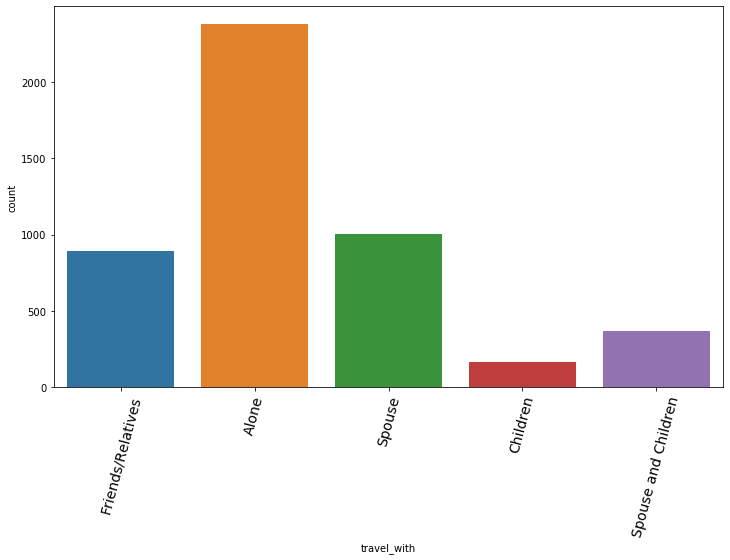

In [13]:
plot_count(data,'travel_with','')

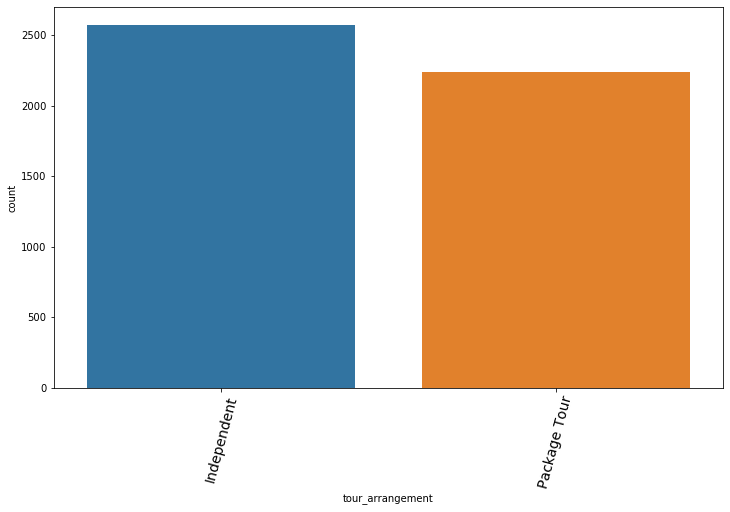

In [17]:
plot_count(data,'tour_arrangement','')

In [14]:
Data = ['UNITED STATES OF AMERICA','UNITED KINGDOM','FRANCE',
       'ITALY','KENYA','SOUTH AFRICA','GERMANY','ZAMBIA','AUSTRALIA','ZIMBABWE']
top3 = data.loc[data['country'].isin(Data)]
top3.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
5,tour_1005,UNITED KINGDOM,25-44,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0


In [15]:
top = top3.groupby(['country'])['travel_with'].value_counts().groupby(level=0).head(10)#total expenditre
top

country                   travel_with        
AUSTRALIA                 Alone                   92
                          Spouse                  63
                          Friends/Relatives       26
                          Spouse and Children      3
                          Children                 2
FRANCE                    Spouse                  95
                          Spouse and Children     65
                          Alone                   59
                          Friends/Relatives       46
                          Children                15
GERMANY                   Alone                   73
                          Spouse                  60
                          Friends/Relatives       46
                          Spouse and Children     32
                          Children                12
ITALY                     Spouse                 159
                          Friends/Relatives      103
                          Alone                   67


In [20]:
sssiond=data.groupby('purpose', as_index=False).agg({"total_cost": "sum"}).sort_values('total_cost', ascending= False)[:10]
sssiond

,purpose,total_cost
1,Leisure and Holidays,3.394122e+10
5,Visiting Friends and Relatives,2.019761e+09
0,Business,1.196016e+09
2,Meetings and Conference,7.653371e+08
6,Volunteering,5.451779e+08
4,Scientific and Academic,3.507831e+08
3,Other,2.037958e+08


tel.groupby(
   ['MSISDN/Number']
).agg(
    {
         'Social_media_total':sum,
         'Google_total':sum,
         'Email_total':sum,
         'Youtube_total':sum,
         'Netflix_total':sum,
         'Gaming_total':sum,
         'Other_total':sum,      
    }
)

In [ ]:
axis = train_dup.groupby('Day')[['Sales']].mean().plot(figsize = (16,5), marker = 'o', color = 'r')
axis.set_title('Average Sales per Day')